In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_csv('datasets/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [96]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [97]:
x=df[['Age','EstimatedSalary']]
y= df['Purchased']

In [98]:
x

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [99]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [100]:
x.shape, y.shape

((400, 2), (400,))

In [101]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [102]:
set(y)

{0, 1}

<Axes: xlabel='Purchased', ylabel='count'>

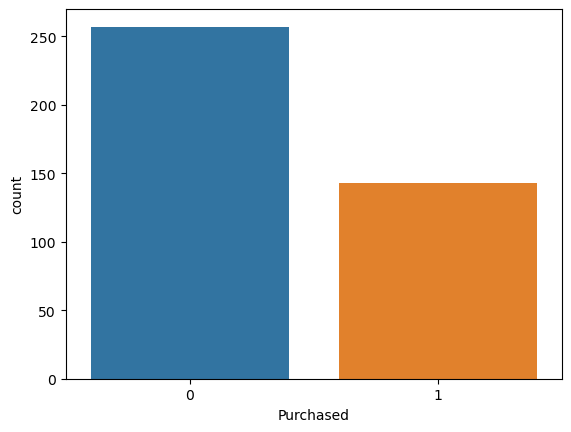

In [103]:
sns.countplot(x=y)

In [104]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

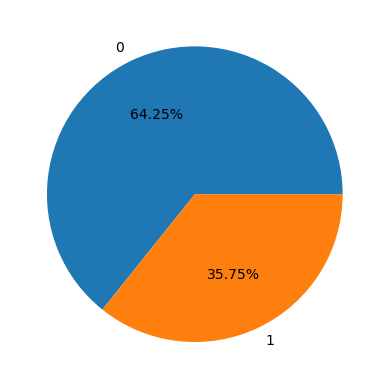

In [105]:
plt.pie(y.value_counts(), labels=y.value_counts().index,autopct='%2.2f%%');

In [106]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

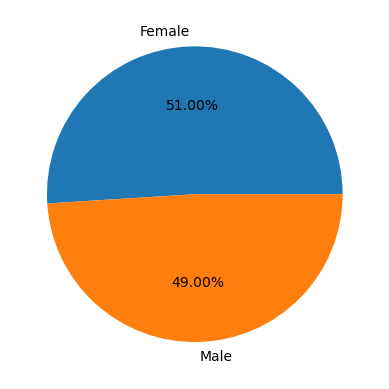

In [107]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index,autopct='%2.2f%%');

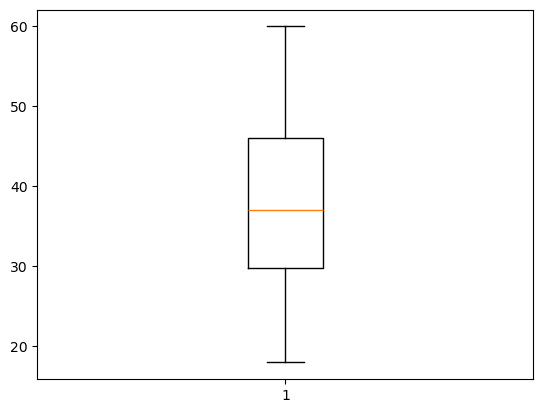

In [108]:
plt.boxplot(df['Age']);

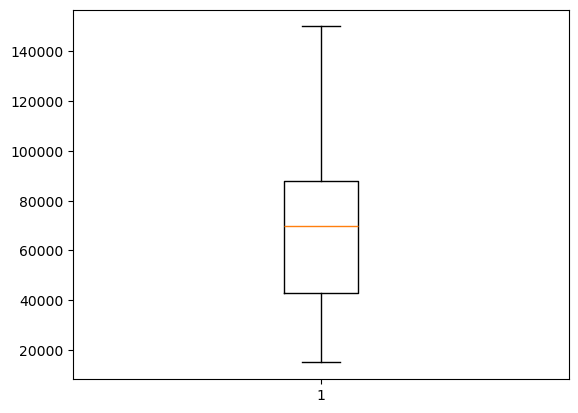

In [109]:
plt.boxplot(df['EstimatedSalary']);

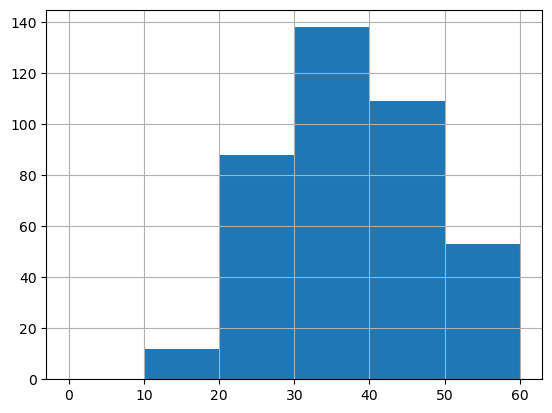

In [110]:
plt.grid()
plt.xticks(range(0,61,10))
plt.hist(df['Age'],range(0,61,10));

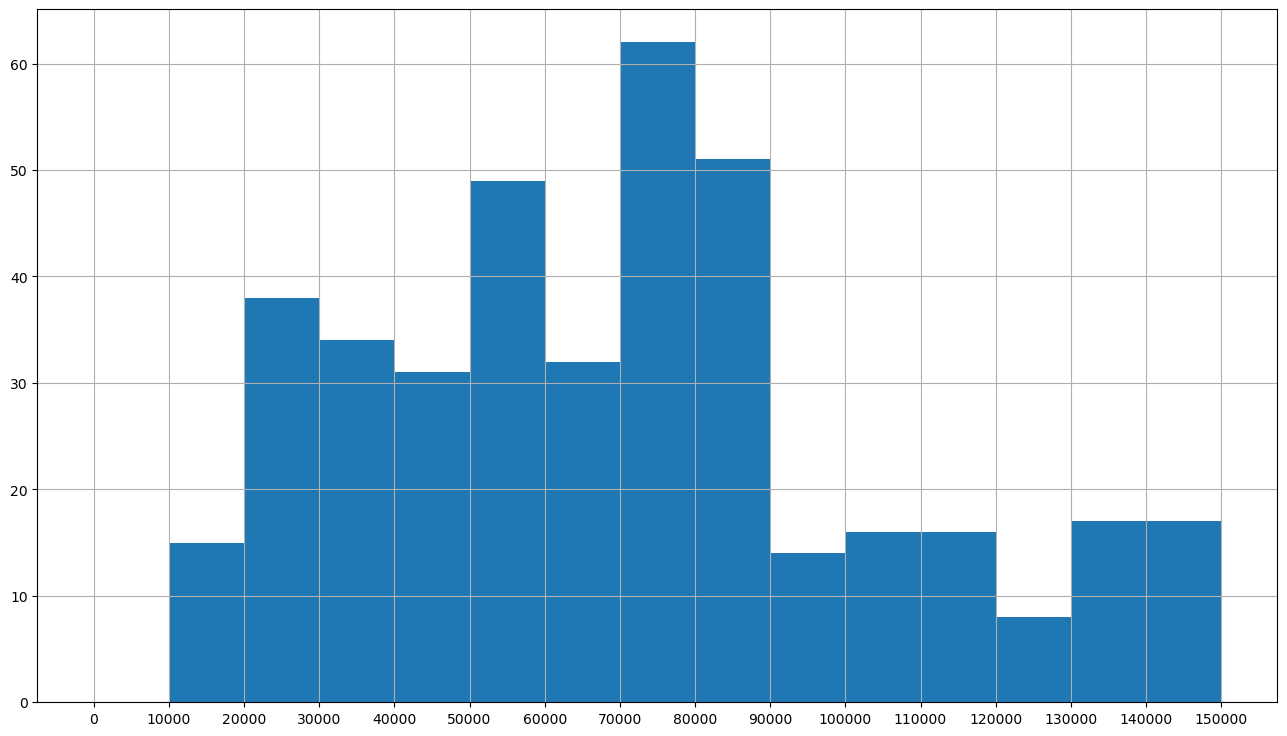

In [111]:
plt.figure(figsize=(16,9))
plt.grid()
plt.xticks(range(0,150001,10000))
plt.hist(df['EstimatedSalary'],range(0,150001,10000));

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


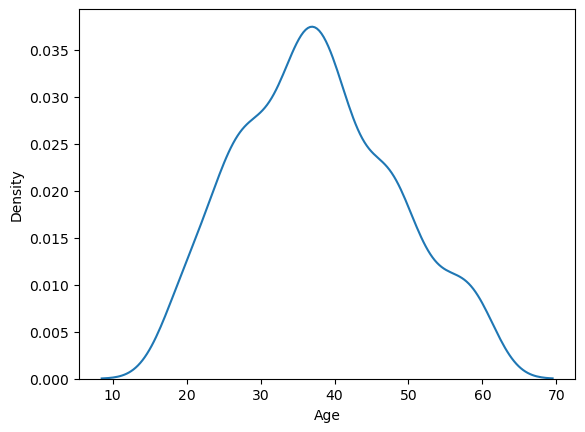

In [112]:
sns.kdeplot(df['Age']);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


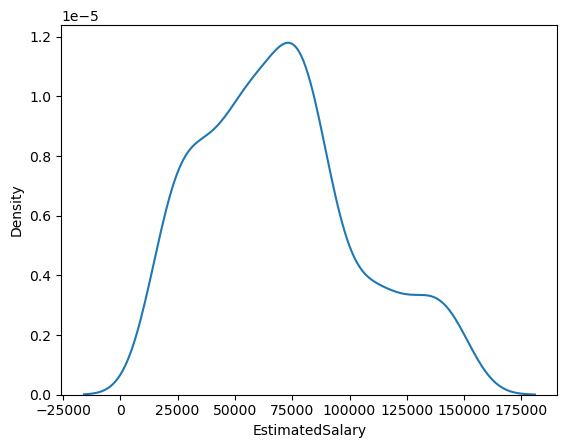

In [113]:
sns.kdeplot(df['EstimatedSalary']);

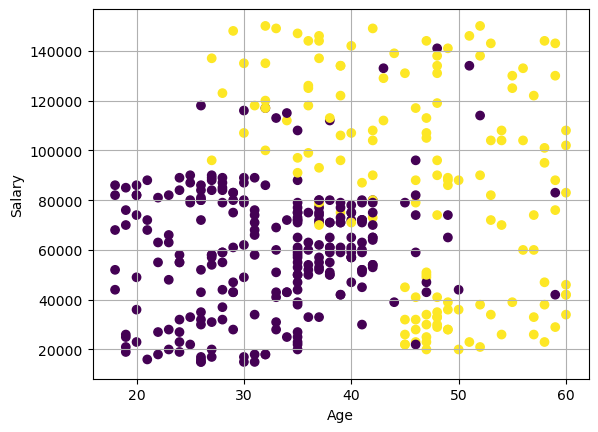

In [114]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'],x['EstimatedSalary'], c=y)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


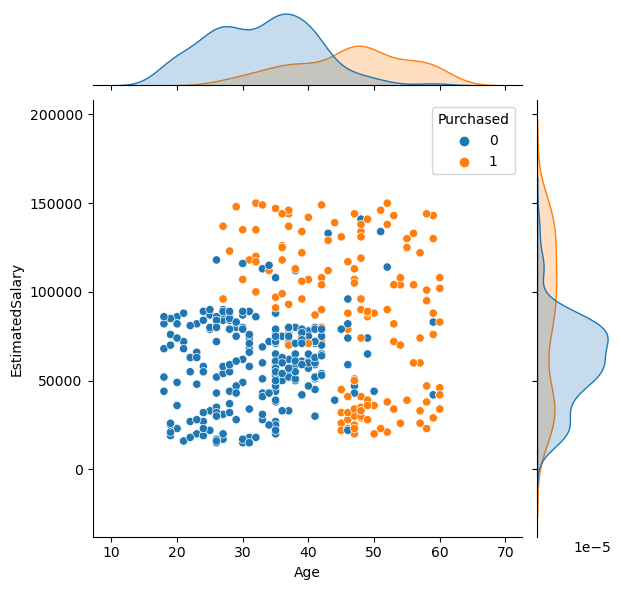

In [115]:
sns.jointplot(x='Age',y='EstimatedSalary', data=df, hue='Purchased');

In [116]:
#import the class
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler() # create object
x_scaled = scaler.fit_transform(x)    # apply the scaling

In [117]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


In [118]:
# Cross Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x_scaled,y,random_state=0)

In [119]:
x_train.shape

(300, 2)

In [120]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [121]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [122]:
classifier.score(x_train,y_train)

0.8033333333333333

In [123]:
# Predict on Unseen data
y_pred=classifier.predict(x_test)

In [124]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [125]:
result=pd.DataFrame({
    'actual': y_test,
    'Predicted':y_pred
})
result

,actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [126]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

#### Performance Evaluation

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [128]:
print(confusion_matrix(y_test,y_pred))

[[67  1]
 [10 22]]


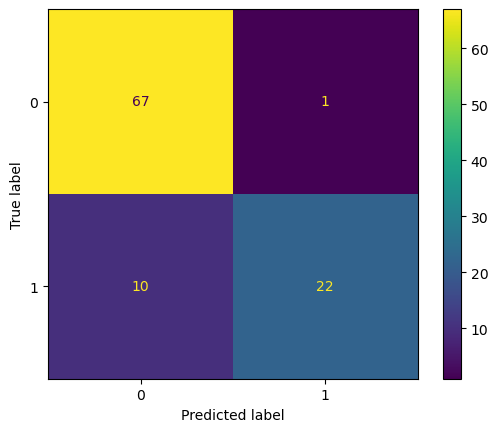

In [129]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [130]:
accuracy_score(y_test,y_pred)

0.89

In [131]:
cm=confusion_matrix(y_test,y_pred)

In [132]:
cm.diagonal().sum()/cm.sum()

0.89

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [134]:
#Accuracy of call 0/ recall/ sensitivity of algorithm
r0=67/68
r0

0.9852941176470589

In [135]:
# recall 1/ Accuracy of class 1/ Specificity of algorithm
r1=22/32
r1

0.6875

In [136]:
#precision of class 0 /+ve Predictive value
p0=67/77
p0

0.8701298701298701

In [137]:
#precision of class 1 /-ve Predictive value
p1=22/23
p1

0.9565217391304348

In [138]:
#f1 score of Class 0
2*p0*r0/(p0+r0)

0.9241379310344828

In [139]:
#f1 score of Class 1
2*p1*r1/(p1+r1)

0.8

In [140]:
classifier.predict_proba(x_test)

array([[0.79225834, 0.20774166],
       [0.75067874, 0.24932126],
       [0.72745429, 0.27254571],
       [0.8159242 , 0.1840758 ],
       [0.81025799, 0.18974201],
       [0.95014473, 0.04985527],
       [0.92927087, 0.07072913],
       [0.39370124, 0.60629876],
       [0.95662616, 0.04337384],
       [0.54623349, 0.45376651],
       [0.88624081, 0.11375919],
       [0.89780651, 0.10219349],
       [0.7548652 , 0.2451348 ],
       [0.61732595, 0.38267405],
       [0.92568557, 0.07431443],
       [0.63220622, 0.36779378],
       [0.67066218, 0.32933782],
       [0.93447243, 0.06552757],
       [0.08457049, 0.91542951],
       [0.87847026, 0.12152974],
       [0.81877656, 0.18122344],
       [0.15276153, 0.84723847],
       [0.67567934, 0.32432066],
       [0.27289303, 0.72710697],
       [0.96313902, 0.03686098],
       [0.13128108, 0.86871892],
       [0.82800591, 0.17199409],
       [0.83014568, 0.16985432],
       [0.72970907, 0.27029093],
       [0.75480803, 0.24519197],
       [0.

#### Prediction of Unseen Data

In [141]:
new=np.array([[23,45000],[54,148000],[37,63000]])
new

array([[    23,  45000],
       [    54, 148000],
       [    37,  63000]])

In [142]:
new_scaler = scaler.transform(new) 
new_scaler

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.11904762, 0.22222222],
       [0.85714286, 0.98518519],
       [0.45238095, 0.35555556]])

In [143]:
classifier.predict(new_scaler)

array([0, 1, 0], dtype=int64)

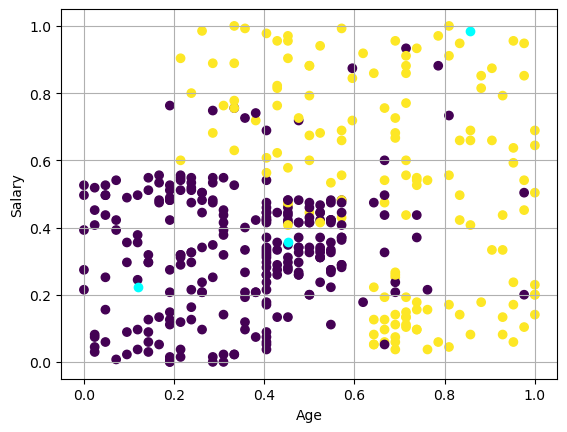

In [144]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x_scaled[:,0],x_scaled[:,1], c=y)
plt.scatter(new_scaler[:,0],new_scaler[:,1], color='cyan')

In [145]:
classifier.predict_proba(new_scaler)

array([[0.94995459, 0.05004541],
       [0.06890179, 0.93109821],
       [0.72598556, 0.27401444]])